In [2]:
from obspy import read
import matplotlib
from pylab import *
from obspy.core import UTCDateTime

#使用累加方式读取多个波
sac = read('sample/after/SC.XJI.2008133160001.D.00.BHE.sac', debug_headers=True)
sac += read('sample/after/SC.XJI.2008133160000.D.00.BHN.sac', debug_headers=True)
sac += read('sample/after/SC.XJI.2008133160000.D.00.BHZ.sac', debug_headers=True)

#打印每个波的概要，sac是一个Stream，包含三个Trace
print sac[0],"\n",sac[1],"\n",sac[2]

SC.XJI.00.BHE | 2008-05-12T16:00:01.550000Z - 2008-05-13T15:31:38.990000Z | 100.0 Hz, 8469745 samples 
SC.XJI.00.BHN | 2008-05-12T16:00:00.450000Z - 2008-05-13T15:31:38.990000Z | 100.0 Hz, 8469855 samples 
SC.XJI.00.BHZ | 2008-05-12T16:00:00.580000Z - 2008-05-13T15:31:38.990000Z | 100.0 Hz, 8469842 samples


In [3]:
#打印某个波的统计信息stats，和数据data
print sac[0].stats
print sac[0].data

#打印AttribDict中的参数的值
print sac[0].stats.sac['stla'], sac[0].stats.sac['stlo']

         network: SC
         station: XJI
        location: 00
         channel: BHE
       starttime: 2008-05-12T16:00:01.550000Z
         endtime: 2008-05-13T15:31:38.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8469745
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'dist': -12345.0, u'isynth': -12345, u'depmin': -12345.0, u'iftype': 1, u'kuser0': u'-12345  ', u'kuser1': u'-12345  ', u'kuser2': u'-12345  ', u'gcarc': -12345.0, u'iinst': -12345, u'ymaximum': -12345.0, u'kevnm': u'-12345          ', u'iqual': -12345, u'unused13': -12345, u'cmpinc': -12345.0, u'imagsrc': -12345, u'norid': -12345, u'nysize': -12345, u'leven': 1, u'unused11': -12345.0, u'unused10': -12345.0, u'lpspol': -12345, u'unused12': -12345.0, u'unused15': -12345, u'unused14': -12345, u'unused17': -12345, u'unused16': -12345, u't6': -12345.0, u't7': -12345.0, u't4': -12345.0, u't9': -12345.0, u't2': -12345.0, u't3': -12345.0, u't0': -12345.0, u't1': -12345.0, 

In [4]:
#注意时间格式UTC
UTCDateTime(sac[0].stats.starttime + sac[0].times()[0])

2008-05-12T16:00:01.550000Z

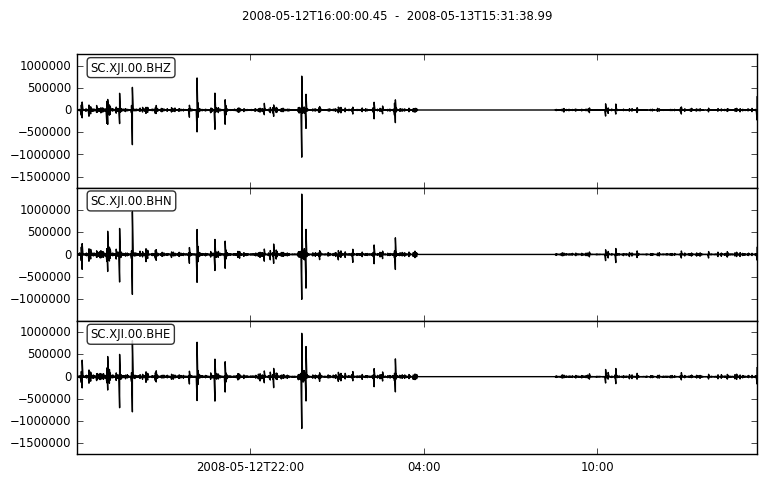

In [5]:
#一次画三幅图（不用下标即可）
sac.plot(size=(800,500))

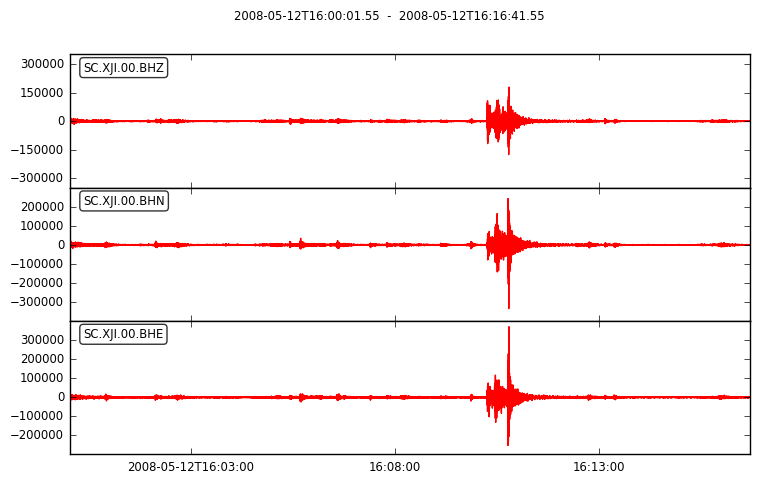

100.0


In [7]:
#画出某个时间段的波形
st = sac[0].stats.starttime #起始时间以某个波的起始时间为准，对应时间没有数据则空白。
sac.plot(color='red', size=(800,500), starttime=st, endtime= st + 1000)
print sac[0].stats.sampling_rate

In [ ]:
#读‘一’个波，画波形图。
singlesac = read('sample/after/SC.XJI.2008133160000.D.00.BHZ.sac', debug_headers=True)
print singlesac[0].stats


st = singlesac[0].stats.starttime
singlesac[0].plot()
print singlesac[0].data #滤波前数据
print singlesac[0].stats.sac.b

#使用filter滤波。考虑其的原理和潜在应用，freq截止频率, corners阶数。
singlesac[0].filter("lowpass", freq=0.5, corners=2, zerophase=True) 
singlesac[0].plot(startime=st, endtime=st+100)
print singlesac[0].data[1000]
print singlesac[0].data[1000+1-100:1000+1], len(singlesac[0].data[1000-99:1000+1]) #滤波后数据改变

In [ ]:
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import recursive_sta_lta
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import delayed_sta_lta
from obspy.signal.trigger import trigger_onset

def minMaxScale(data, range=(-1, 1)):
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=range)
    scaledData = scaler.fit_transform(data).reshape(1, -1)[0]
    return scaledData

singlesac = read('sample/after/SC.XJI.2008133160000.D.00.BHZ.sac', debug_headers=True)
trace = singlesac[0]
# trace.data = trace.data[100000:200000]
# trace.data = minMaxScale(trace.data[100000:200000], range=(-100,100))
samp_rate = trace.stats.sampling_rate

cft = recursive_sta_lta(trace.data, int(10 * samp_rate), int(1000 * samp_rate))
print np.mean(cft), np.max(cft), np.std(cft)
a = np.mean(cft) + (np.max(cft) - np.mean(cft))/4
print a
plot_trigger(trace, cft, a, a)
on_of = trigger_onset(cft, a, a)
print on_of

In [ ]:
from obspy.core import read
from obspy.signal.trigger import ar_pick

tr1 = read('sample/after/SC.XJI.2008133160000.D.00.BHZ.sac')[0]
tr2 = read('sample/after/SC.XJI.2008133160000.D.00.BHN.sac')[0]
tr3 = read('sample/after/SC.XJI.2008133160001.D.00.BHE.sac')[0]

df = tr1.stats.sampling_rate
p_pick, s_pick = ar_pick(tr1.data, tr2.data, tr3.data, df, 1.0, 20.0, 1.0, 0.1, 4.0, 1.0, 2, 8, 0.1, 0.2)
print p_pick, s_pick

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import obspy


# Read in all files starting with dis.
st = obspy.read('./sample/after/SC.XJI.2008133160000.D.00.BHN.sac')
st += obspy.read('./sample/after/SC.XJI.2008133160000.D.00.BHz.sac')
st += obspy.read('./sample/after/SC.XJI.2008133160001.D.00.BHe.sac')

# sort
st.sort(['starttime'])
# start time in plot equals 0
dt = st[0].stats.starttime.timestamp

# Go through the stream object, determine time range in julian seconds
# and plot the data with a shared x axis
ax = plt.subplot(4, 1, 1)  # dummy for tying axis
for i in range(3):
    plt.subplot(4, 1, i + 1, sharex=ax)
    t = np.linspace(st[i].stats.starttime.timestamp - dt,
                    st[i].stats.endtime.timestamp - dt,
                    st[i].stats.npts)
    plt.plot(t, st[i].data)

# Merge the data together and show plot in a similar way
st.merge(method=1, interpolation_samples=-1)
plt.subplot(4, 1, 4, sharex=ax)
t = np.linspace(st[0].stats.starttime.timestamp - dt,
                st[0].stats.endtime.timestamp - dt,
                st[0].stats.npts)
plt.plot(t, st[0].data, 'r')
plt.show()

In [ ]:
from obspy import read
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pylab import *

sac = read('./sample/example30/01.JMG.BHE.SAC')[0]
print sac.data, len(sac.data)
ti = sac.stats.starttime
print ti
print ti + sac.stats.sac.a
print ti + sac.stats.sac.t0
plt.plot(sac.data, 'k')

In [ ]:
import numpy as np
a = [0,1,2,3,4,5]
b = [1,2,3]
print a[4-1+4:4], a[4:6]
print np.concatenate([a,b])

In [ ]:
a = [1,2,3]

print a[10:12]

In [ ]:
import numpy as np
a = np.array([[1,2,3,4,5],[1,2,3,4,5]])
b = np.array([[100,100,100,100,100],[100,100,100,100,100],[100,100,100,100,100]])
print np.concatenate([a,b])

In [ ]:
a = [[1,2,3,4,5],[1,2,3,4,5]]
b = [[100,100,100,100,100],[100,100,100,100,100],[100,100,100,100,100]]
print a+b
print np.concatenate([a,b])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
a = np.array([[1,2,3,4,5,6,7]])
b = StandardScaler().fit_transform(a.reshape(-1,1)).reshape(1,-1)
print b
print np.random.randint(1,1000-30)

In [ ]:
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))
print data, data.shape

In [ ]:
print labels, labels.shape

In [ ]:
a = np.array([[1,12],[3, 4]])
print len(a)
b = [[1,1],[2,2],[3,3]]
print b


In [13]:
from obspy.core import read
from obspy.signal.trigger import plot_trigger
trace = read("https://examples.obspy.org/ev0_6.a01.gse2")[0]
df = trace.stats.sampling_rate
print df

200.0


AttributeError: idep

In [11]:
import os
print os.path.join('%s/%s' % ('./aooo/yes', '/yes'))

./aooo/yes///yes


In [16]:
a = 'aaaab'
print 'aaaab'==a

True
